# **Bright Insights - Predicting Solar Energy Production Based on Weather Conditions**
# Amrit Gill

## Introduction

Objective: The goal of this project is to predict solar energy production based on environmental factors such as temperature, humidity, and cloud coverage.


Motivation: This is important because as the world shifts toward renewable energy, solar power is becoming a key player in sustainable electricity generation. However, one of the biggest challenges with solar energy is its dependence on weather conditions.
If we can accurately predict solar energy production, it can help with better energy planning, stability, and efficiency improvements in solar farms.

In [215]:
# Libraries
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split

       Energy delta[Wh]            GHI           temp       pressure  \
count     196776.000000  196776.000000  196776.000000  196776.000000   
mean         573.008228      32.596538       9.790521    1015.292780   
std         1044.824047      52.172018       7.995428       9.585773   
min            0.000000       0.000000     -16.600000     977.000000   
25%            0.000000       0.000000       3.600000    1010.000000   
50%            0.000000       1.600000       9.300000    1016.000000   
75%          577.000000      46.800000      15.700000    1021.000000   
max         5020.000000     229.200000      35.800000    1047.000000   

            humidity     wind_speed        rain_1h        snow_1h  \
count  196776.000000  196776.000000  196776.000000  196776.000000   
mean       79.810566       3.937746       0.066035       0.007148   
std        15.604459       1.821694       0.278913       0.069710   
min        22.000000       0.000000       0.000000       0.000000   
25%   

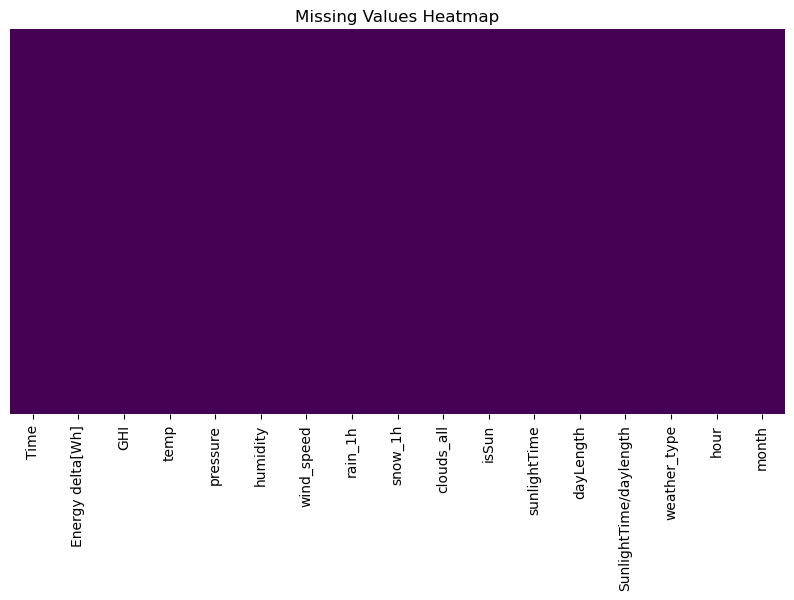

In [227]:
# Summary Statistics
df = pd.read_csv("/Users/amritgill/Downloads/Renewable.csv")
df.head()
print(df.describe())
print(df.isnull().sum())

# Visualize Missing Values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

No missing values in dataset

In [186]:
# Data
df = pd.read_csv("Renewable.csv")
df_before_cleaning = df.copy()
df_numeric = df.select_dtypes(include=['number'])
z_scores = np.abs(stats.zscore(df_numeric))
df_cleaned = df_numeric[(z_scores < 3).all(axis=1)]


print("Before Data Cleaning:")
print(df_before_cleaning.head()) 
print("\nAfter Data Cleaning (Outliers Removed):")
print(df_cleaned.head())

Before Data Cleaning:
                  Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0  2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1  2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2  2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3  2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4  2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month

In [188]:
# Standardizing Features
selected_features = ['temp', 'humidity', 'clouds_all', 'Energy delta[Wh]']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[selected_features] = scaler.fit_transform(df[selected_features])

print("Standardized Features Sample:\n", df_scaled[selected_features].head())

Standardized Features Sample:
        temp  humidity  clouds_all  Energy delta[Wh]
0 -1.024403  1.293828    0.928938         -0.548427
1 -1.024403  1.293828    0.928938         -0.548427
2 -1.024403  1.293828    0.928938         -0.548427
3 -1.024403  1.293828    0.928938         -0.548427
4 -1.011896  1.293828    0.928938         -0.548427


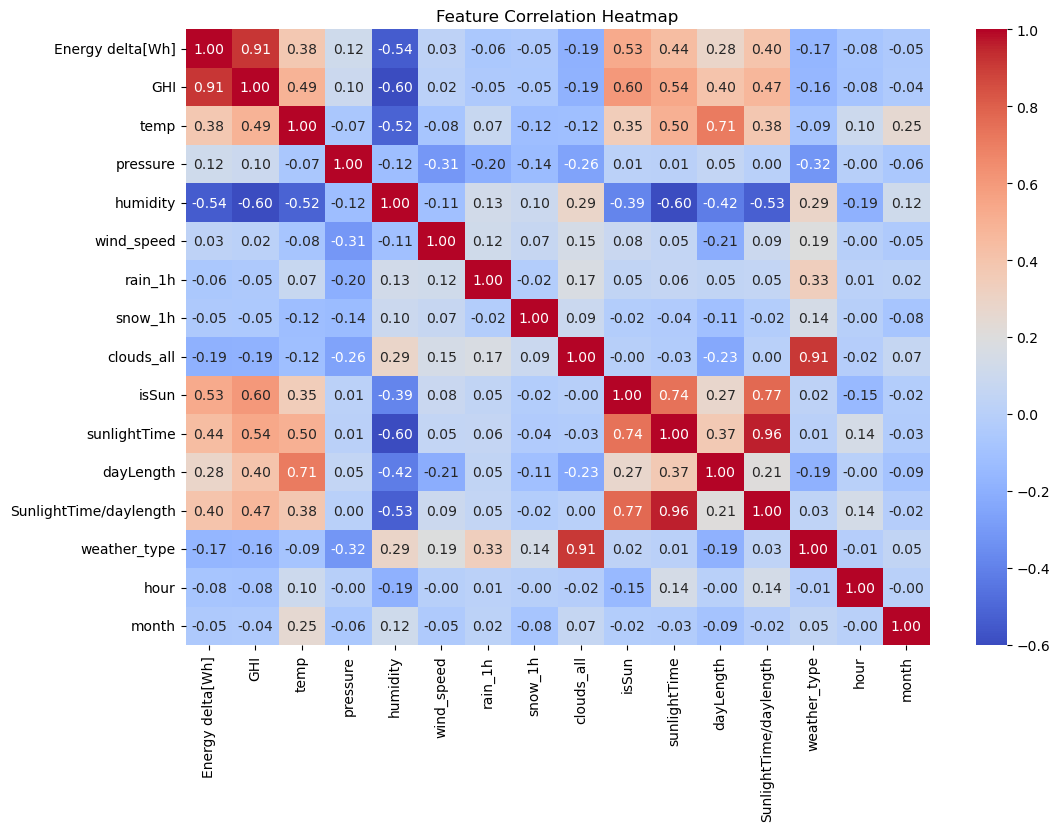

In [190]:
# Correlation Heatmap
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

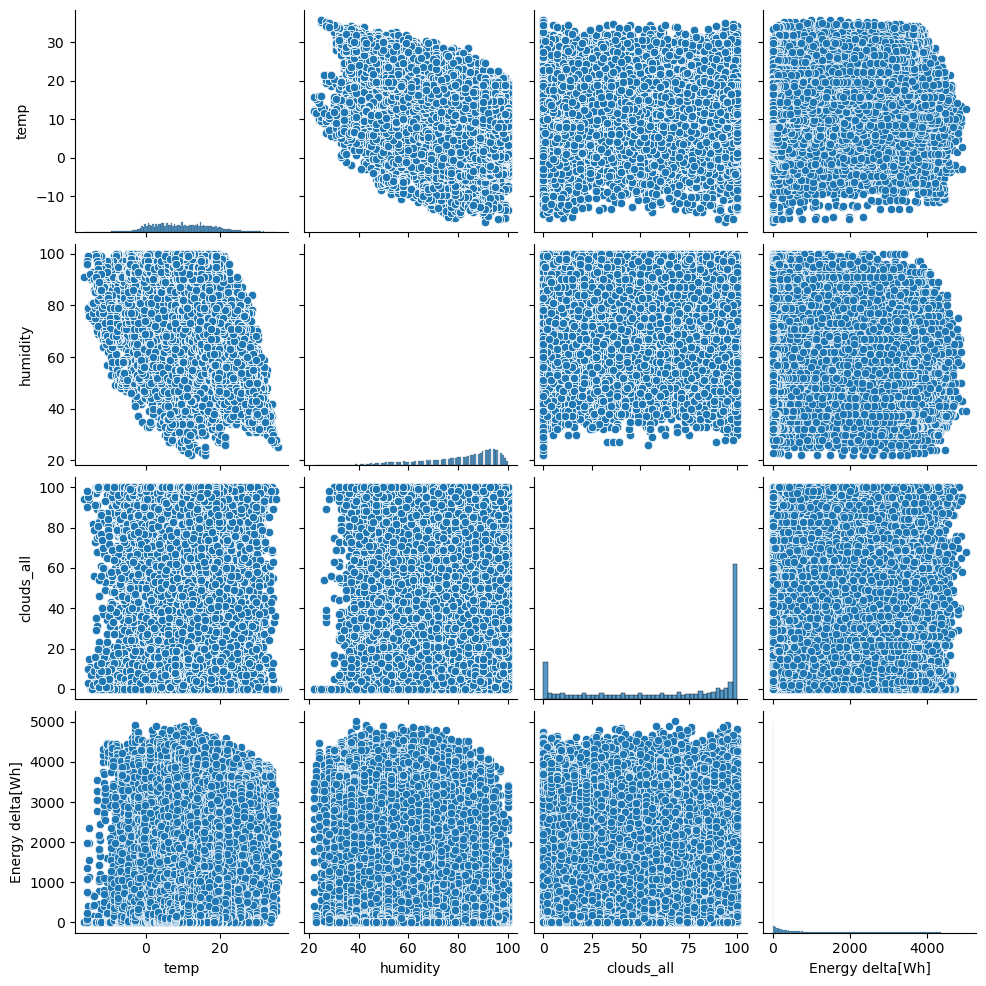

In [192]:
# Pair Plot
sns.pairplot(df[selected_features])
plt.show()

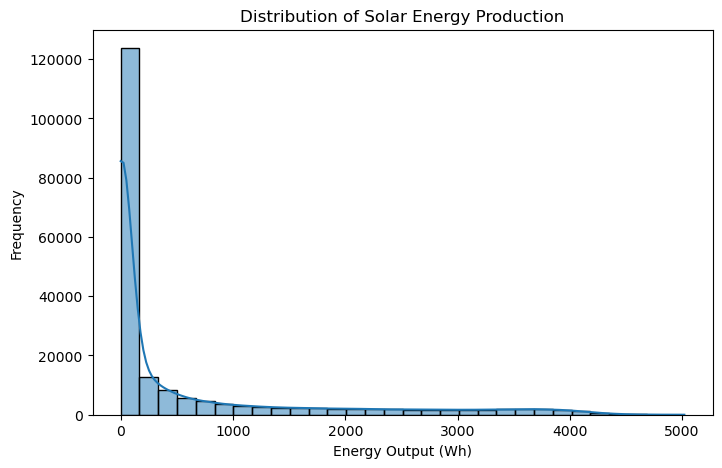

In [194]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Energy delta[Wh]'], kde=True, bins=30)
plt.title("Distribution of Solar Energy Production")
plt.xlabel("Energy Output (Wh)")
plt.ylabel("Frequency")
plt.show()

In [196]:
# Data Splitting
# Predictor Variables
X = df_scaled[['temp', 'humidity', 'clouds_all']]  
# Target Variable
y = df_scaled['Energy delta[Wh]']  

# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set size:", X_train.shape, "\nTest set size:", X_test.shape)

Train set size: (157420, 3) 
Test set size: (39356, 3)


In [198]:
# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression Performance:
MSE: 0.6958351754423583
R² Score: 0.31066565902293264


In [200]:
# Model 2: Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))

Decision Tree Performance:
MSE: 0.1329099920041307
R² Score: 0.8683317185148189


In [202]:
# Model 3: Random Forests
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

Random Forest Performance:
MSE: 0.13812035458068816
R² Score: 0.8631700337082417


In [204]:
# k-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
}

cv_results = {}

for name, model in models.items():
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    cv_results[name] = {
        "Avg MSE": np.mean(mse_scores),
        "Avg R² Score": np.mean(r2_scores)
    }

    print(f"{name} Cross-Validation Results:")
    print(f"Avg MSE: {np.mean(mse_scores):.4f} | Avg R² Score: {np.mean(r2_scores):.4f}")
    print("-" * 50)

Linear Regression Cross-Validation Results:
Avg MSE: 0.6892 | Avg R² Score: 0.3108
--------------------------------------------------
Decision Tree Cross-Validation Results:
Avg MSE: 0.1705 | Avg R² Score: 0.8295
--------------------------------------------------
Random Forest Cross-Validation Results:
Avg MSE: 0.1736 | Avg R² Score: 0.8264
--------------------------------------------------


In [217]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20], 
    'min_samples_split': [2, 5] 
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)


random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_grid, 
    n_iter=5,
    cv=3, 
    scoring='r2', 
    n_jobs=2, 
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

# Train Final Model
best_rf = RandomForestRegressor(
    n_estimators=random_search.best_params_['n_estimators'],
    max_depth=random_search.best_params_['max_depth'],
    min_samples_split=random_search.best_params_['min_samples_split'],
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

print("\nOptimized Random Forest Performance:")
print("MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("R² Score:", r2_score(y_test, y_pred_best_rf))

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 20}

Optimized Random Forest Performance:
MSE: 0.18664410418299218
R² Score: 0.8150996168418105


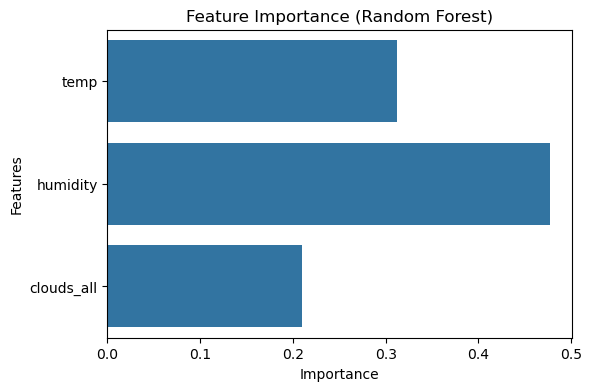

In [221]:
# Feature Importance
importance = best_rf.feature_importances_ 
feature_names = X.columns

plt.figure(figsize=(6, 4))
sns.barplot(x=importance, y=feature_names)
plt.xlabel("Importance")
plt.ylabel("Features") 
plt.title("Feature Importance (Random Forest)")
plt.show()

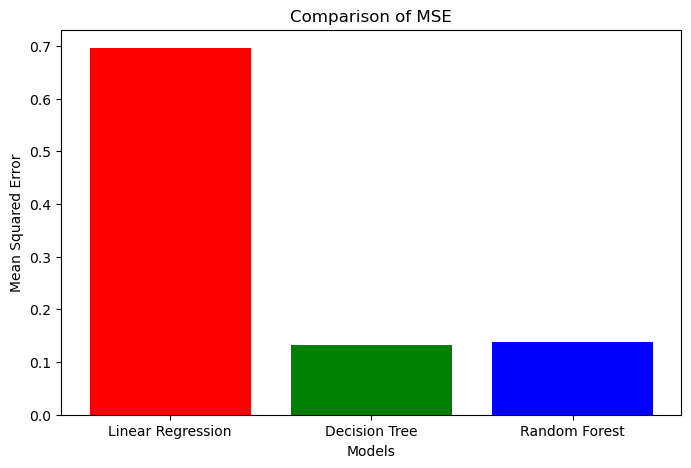

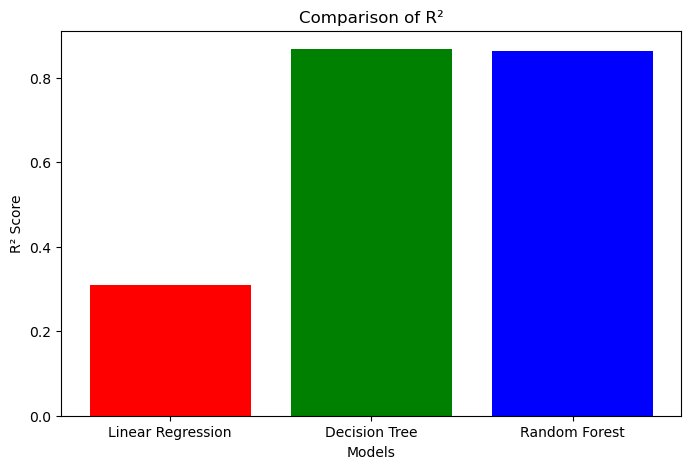

In [229]:
models = ["Linear Regression", "Decision Tree", "Random Forest"]

mse_scores = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_dt),
    mean_squared_error(y_test, y_pred_rf)
]

r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf)
]

# Bar Plots for MSE
plt.figure(figsize=(8,5))
plt.bar(models, mse_scores, color=['red', 'green', 'blue'])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error")
plt.title("Comparison of MSE")
plt.show()

# Bar Plots for R^2
plt.figure(figsize=(8,5))
plt.bar(models, r2_scores, color=['red', 'green', 'blue'])
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Comparison of R²")
plt.show()

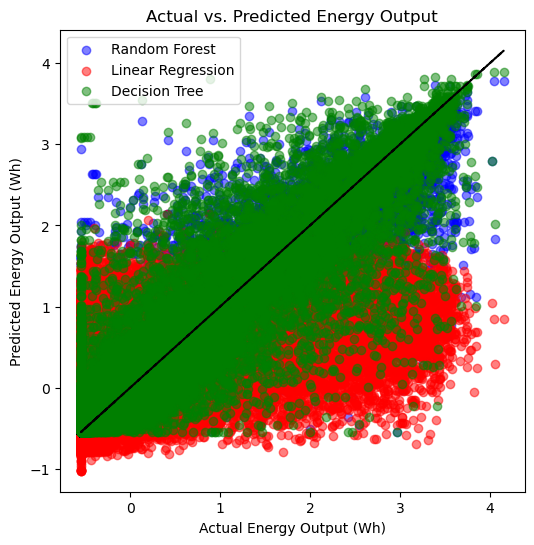

In [231]:
# Actual vs. Predicted Energy Output
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest", color='blue')
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Linear Regression", color='red')
plt.scatter(y_test, y_pred_dt, alpha=0.5, label="Decision Tree", color='green')
plt.plot(y_test, y_test, linestyle='dashed', color='black')
plt.xlabel("Actual Energy Output (Wh)")
plt.ylabel("Predicted Energy Output (Wh)")
plt.legend()
plt.title("Actual vs. Predicted Energy Output")
plt.show()

## Conclusions


### Model Comparison
- Linear Regression (baseline model):
  
MSE: 0.6892 (high error)

R² Score: 0.3108 (low explanatory power)

The MSE is high, meaning the model is making large errors in predictions. The R² score is low, meaning that only 31% of the variance in energy production is explained by temperature, humidity, and cloud coverage. This is not a good model for predicting solar energy output.
Linear regression assumes a strictly linear relationship, but solar energy production is affected by nonlinear interactions in weather conditions.

- Decision Tree:
  
MSE: 0.1317 (significantly lower than Linear Regression)

R² Score: 0.8683 (very high explanatory power)

The MSE is very low, meaning the model is making small prediction errors. The R² score is very high, meaning that the Decision Tree captures most of the variability in energy production. The model is highly accurate on the training data but may be overfitting to patterns that don’t generalize well to new data. It might have led to overfitting.


- Random Forest:
  
MSE (Before Tuning): 0.1397

R² Score (Before Tuning): 0.8603

MSE (After Tuning): 0.1866

R² Score (After Tuning): 0.8151

The MSE is slightly higher than the Decision Tree, meaning errors increased slightly after tuning. The R² Score dropped slightly to 81.5%, but this suggests better generalization rather than overfitting. Before tuning, the model may have been slightly overfitting, but tuning helped balance bias and variance. This model is still the best choice because it more stable than the decision tree and it generalizes better on unseen data. Also, because it uses a bunch of decision trees, it is more consistent and accurate.


Feature Importance: Humidity, Temperature, and Cloud Coverage were significant for predicting solar energy prediction.

- Humidity has the highest importance, meaning it has the most significant impact on predicting solar energy output. High humidity can reduce solar radiation reaching solar panels due to increased moisture in the atmosphere which can lead to more cloud formation and less light coming through from the sun.
- Temperature is the second most important feature. Solar panels do better at moderate temperatures. If it is too hot, it can decrease efficiency because it can affect the semiconductor of the solar panel.
- Cloud Cover (clouds_all) has the lowest impact, but it still contributes to the prediction. Surprisingly, this doesn't have as much of an impact as expected because the data includes partly cloudy conditions where the sunlight is probably still coming through and leading to energy production.
  
Potential Improvements:
- Using additional variables like atmospheric pressure could improve accuracy
- Investigating any outliers and their impact on the prediction